In [1]:
from itertools import product
import pickle
import importlib
import numpy as np
import matplotlib as mpl
from matplotlib import colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects
from matplotlib.patches import Rectangle
from matplotlib import rcParams
from cycler import cycler
mpl.rcParams.update(mpl.rcParamsDefault)
textwidth = 5.45776
golden_ratio = 0.6180339887498949

with open('H_eff_parameters.pkl', 'rb') as f:
    H_eff_parameters = pickle.load(f)   

plt.style.use(['default', './paper.mplstyle'])

In [2]:
import plot    
#import funcs
def reload():
    import importlib
    import plot    
    #import funcs
    
    importlib.reload(plot)    
    #importlib.reload(funcs)

reload()

In [ ]:
import pickle

with open('disorder_profile.pkl','rb') as f:
    disorder_profile = pickle.load(f)
    print(disorder_profile.shape)

In [5]:
m0  = [-0.017, 0.006]
m1  = [ 16.35, 13.83]
D   = [-13.31,-13.38]
v_F = [ 1.920, 2.887]
m_zs =[  0.02, 0.02]
mus = [0.0135, 0.001]
Smag_imps = [0.01,0.01]
E_a = [0.0135,0.0042]

In [7]:
data = []
xs = []
values2plot=dict()
for i in range(2):
    for j in range(2):
        params=dict(
            a=10,
            a_z=10,
            L=30000,
            W=500,
            T=1,
            delta=1e-3,
            mu=mus[j]-(m0[j]+m_zs[j])*D[j]/m1[j],
            Smag_imp=Smag_imps[j],
            m_z=m_zs[j],
            correlation_length=20,
            n_av=20,
            k=30,
            sum=True,
            m0=m0[j],
            m1=m1[j],
            D=D[j],
            v_F=v_F[j]
        )
        if i == 0:
            params.pop('Smag_imp')
        else:
            params.pop('L')
        learner = plot.learner_from_param(
            folder="./data/finite_lenght_spectrum",
            prefix='data_learner_',
            **params)
        data.append(learner.extra_data)
        xs  .append(np.sort(list(learner.extra_data.keys())))

Load 49 points form data\finite_lenght_spectrum\data_learner_a10_a_z10_L30000_W500_T1_delta0p0010_mu0p0159_m_z0p0200_correlation_length20_n_av20_k30_sumTrue_m0-0p0170_m116p3500_D-13p3100_v_F1p9200.pickle
Load 49 points form data\finite_lenght_spectrum\data_learner_a10_a_z10_L30000_W500_T1_delta0p0010_mu0p0262_m_z0p0200_correlation_length20_n_av20_k30_sumTrue_m00p0060_m113p8300_D-13p3800_v_F2p8870.pickle
Load 98 points form data\finite_lenght_spectrum\data_learner_a10_a_z10_W500_T1_delta0p0010_mu0p0159_Smag_imp0p0100_m_z0p0200_correlation_length20_n_av20_k30_sumTrue_m0-0p0170_m116p3500_D-13p3100_v_F1p9200.pickle
Load 98 points form data\finite_lenght_spectrum\data_learner_a10_a_z10_W500_T1_delta0p0010_mu0p0262_Smag_imp0p0100_m_z0p0200_correlation_length20_n_av20_k30_sumTrue_m00p0060_m113p8300_D-13p3800_v_F2p8870.pickle


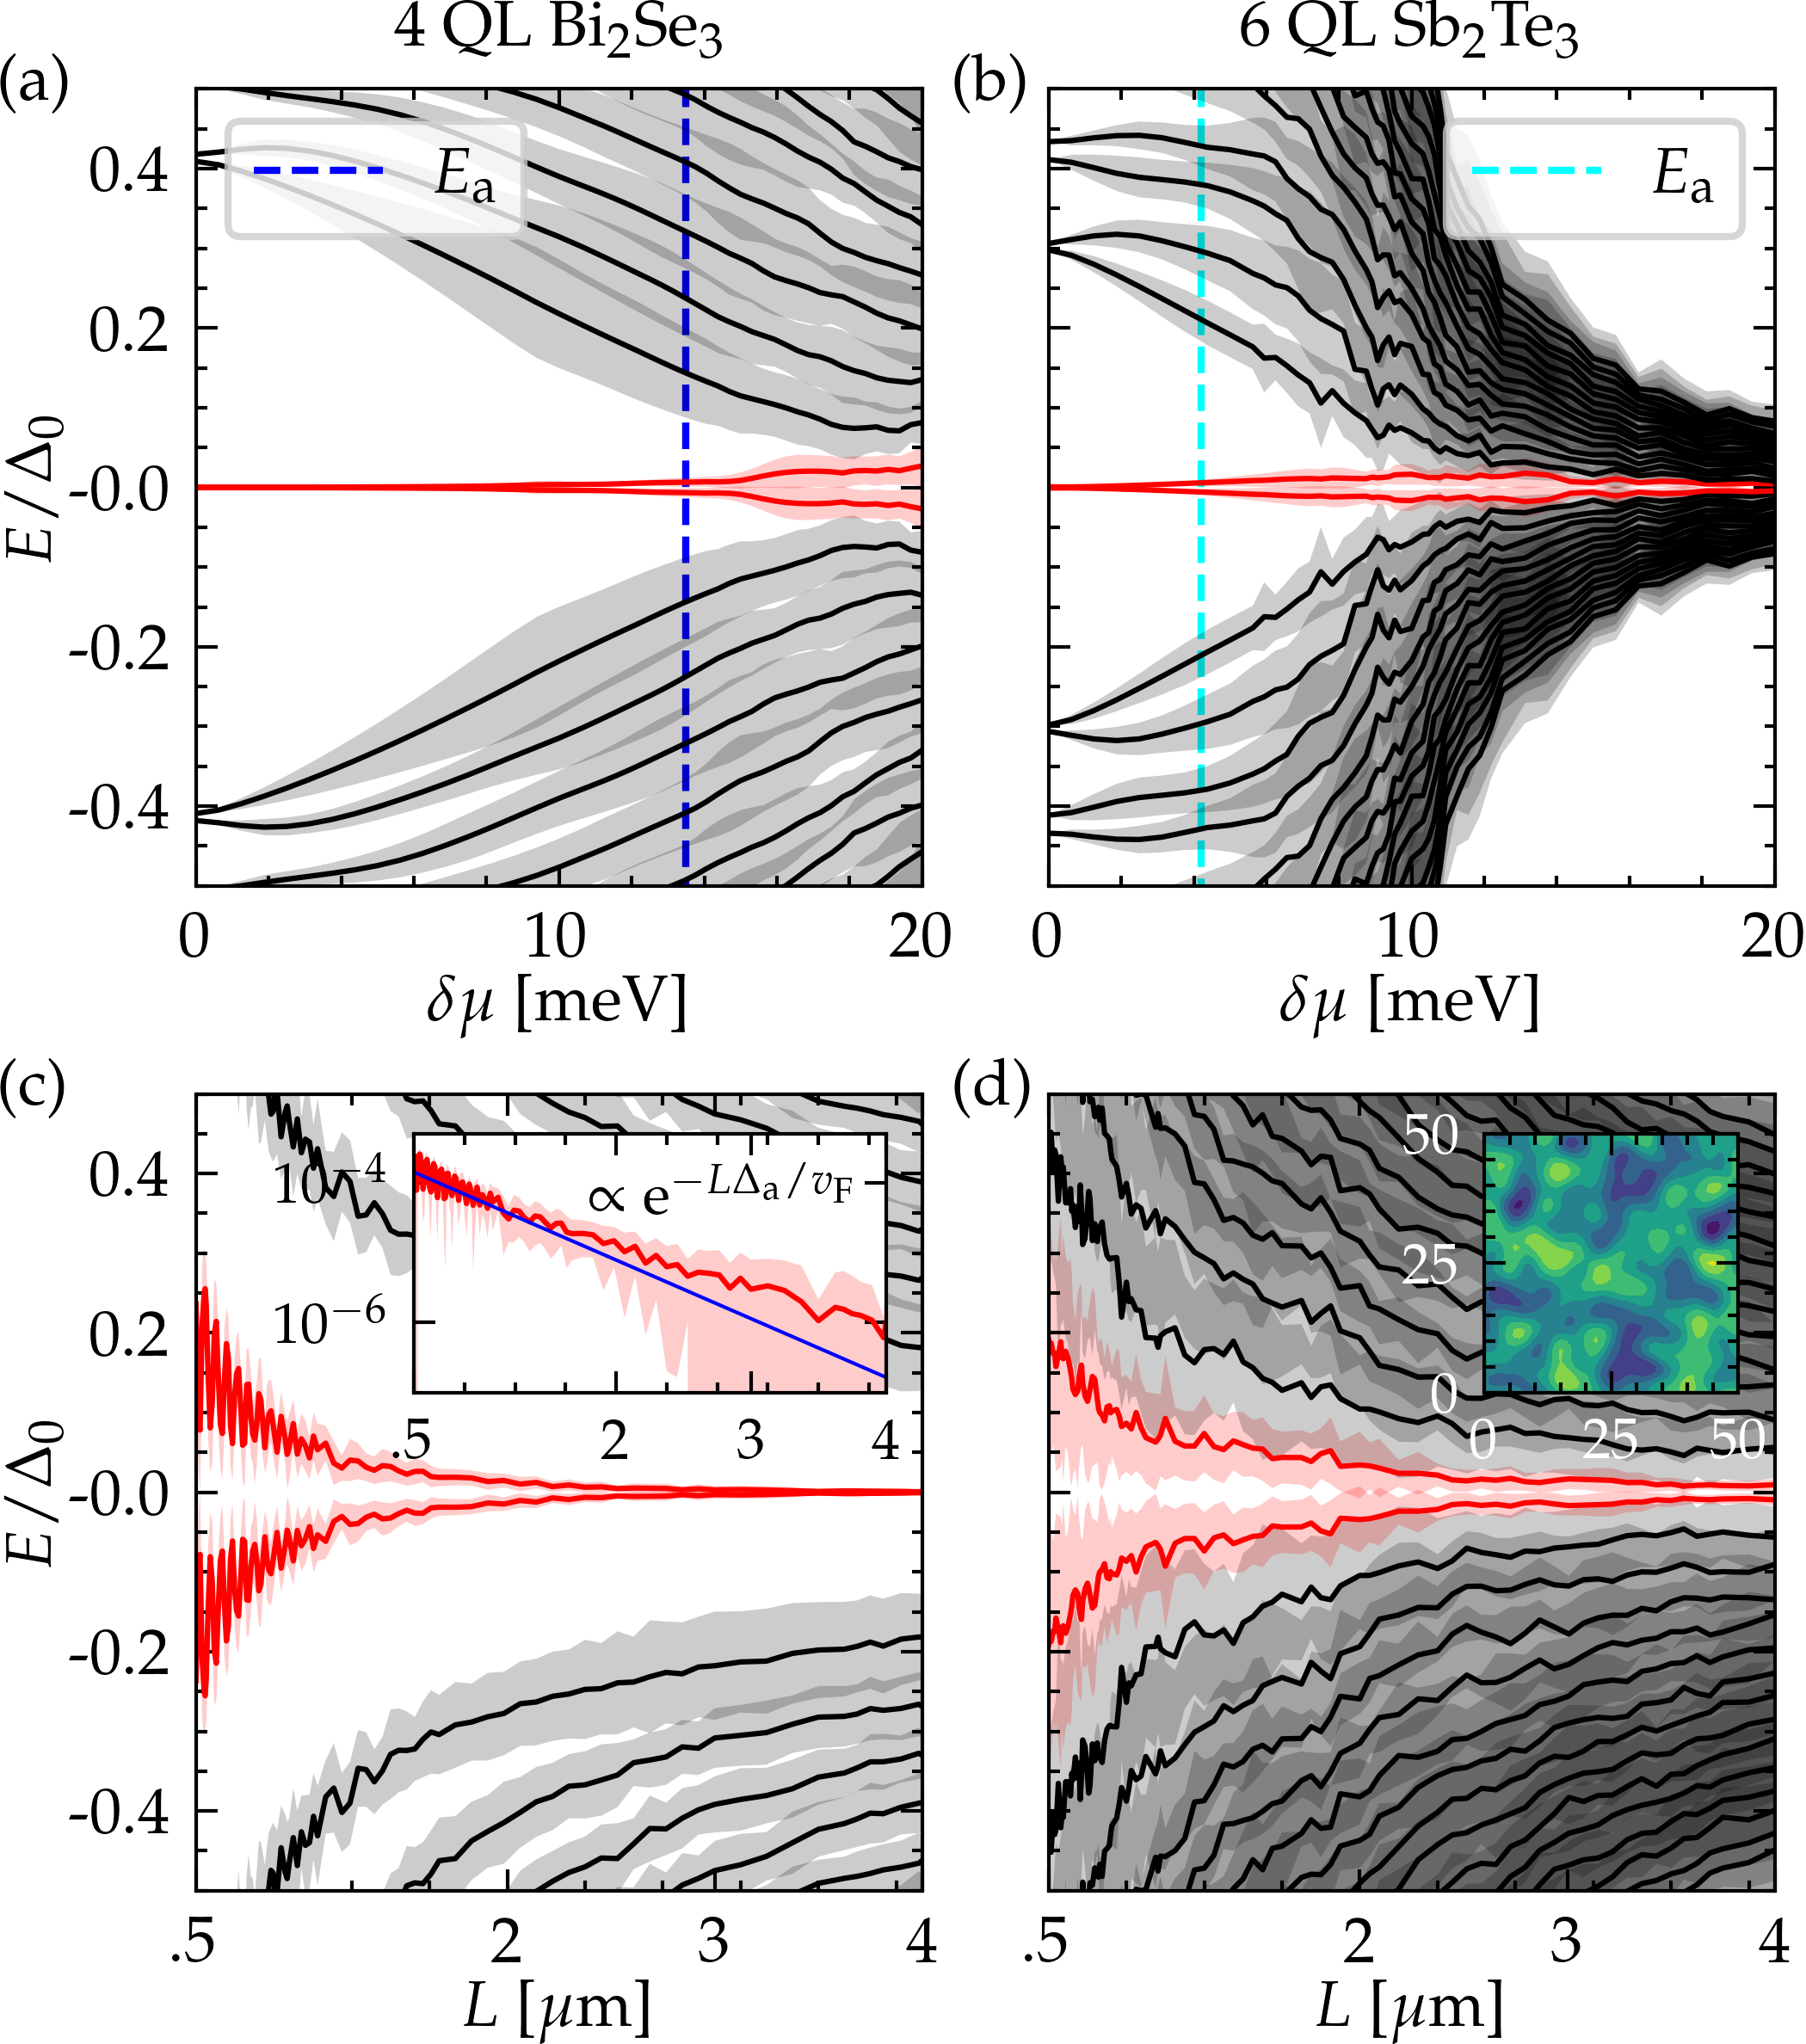

In [22]:
fig, ax = plt.subplots(2,2,figsize=(3.5,4),layout='constrained')
fig.get_layout_engine().set(w_pad=0.00, h_pad=0.02, wspace=0.0, hspace=0.0)

for i in range(2):
    for j in range(2):
        if i == 0:
            xs_to_plot = xs[i*2+j]*1e3
        else:
            xs_to_plot = xs[i*2+j]/1e4
        Data = data[i*2+j]
        data_to_plot = np.array([Data[x]['Es_mean'] for x in xs[i*2+j]])
        
        cutoff = .5e-3
        middle = 15
        std = []

        for x in xs[i*2+j]:
            std.append( np.std(np.array([Data[x]['Es'][ii] for ii in range(20)]),axis=0))
        std = np.array(std)

        for ii in range(len(std[0,:])):
            if ii == middle-1 or ii == middle:
                c = "r"
            else:
                c = "k"
            ax[i,j].fill(np.append(xs_to_plot,xs_to_plot[::-1]),np.append(data_to_plot[:,ii]-std[:,ii],(data_to_plot[:,ii]+std[:,ii])[::-1]),color=c,alpha=.2,ls="")
            #if i == 0 and j == 1:
            #    ax[i,j].fill_between(np.append(xs_to_plot,[20,0]),np.append(data_to_plot[:,0],[-1e-3,-1e-3]), hatch='xxxx', edgecolor='k',facecolor='white')
            #    ax[i,j].fill_between(np.append(xs_to_plot,[20,0]),np.append(data_to_plot[:,-1],[1e3,1e3]), hatch='xxxx', edgecolor='k',facecolor='None')
        ax[i,j].plot(xs_to_plot,data_to_plot[:,:middle-1],"k-",lw=.75);
        ax[i,j].plot(xs_to_plot,data_to_plot[:,middle-1:middle+1],"r-",lw=.75);
        ax[i,j].plot(xs_to_plot,data_to_plot[:,middle+1:],"k-",lw=.75);
        #plt.plot(xs[i],data_to_plot[np.where(data_to_plot>0)[0][0]],"r_",ms=10)
        #plt.plot(xs[i],data_to_plot[np.where(data_to_plot<0)[0][-1]],"r_",ms=10)
        if j == 0:
            ax[i,j].set_yticks(np.arange(-.8e-3,.9e-3,.2e-3),[np.round(i,1) for i in np.arange(-.8,.9,.2)]);
        else:
            ax[i,j].set_yticks(np.arange(-.8e-3,.9e-3,.2e-3),[]*5);
        ax[i,j].set_ylim(-cutoff,cutoff)
        
        if i == 0:
            ax[i,j].set_xlabel("$\delta \mu$ [meV]",labelpad=0);
            ax[i,j].set_xlim(0,20);
            ax[i,j].plot([1e3*E_a[j]]*2,[-1,1],c=["blue","cyan"][j],ls="--",zorder=-1,label="$E_\\text{a}$");
            ax[i,j].legend(loc=["upper left","upper right"][j],frameon=True);
        else:
            ax[i,j].set_xlabel("$L$ [$\mu$m]",labelpad=0);
            ax[i,j].set_xticks([.5,2,3,4],['.5','2','3','4']);
            ax[i,j].set_xlim(.5,4);

#for j in range(2):
    #ax[0,j].plot([1e3*Smag_imps[j]]*2,[-1,1],"k:",zorder=-1,lw=.5);
    #ax[0,j].text(1e3*Smag_imps[j]-2.5,.5e-4,["(c)","(d)"][j]);

ax[0,0].set_ylabel("$E/\Delta_0$",labelpad=0); ax[1,0].set_ylabel("$E/\Delta_0$",labelpad=0);

ax_inset = ax[1,0].inset_axes([.3,.625,.65,.325])

xs_to_plot = xs[2]/1e4
Data = data[2]
data_to_plot = np.array([Data[x]['Es_mean'] for x in xs[2]])

std = []

ii = middle

for x in xs[2]:
    std.append( np.std(np.array([Data[x]['Es'][ii] for ii in range(20)]),axis=0))
std = np.array(std)

c = "r"
ax_inset.fill(np.append(xs_to_plot,xs_to_plot[::-1]),np.append(data_to_plot[:,ii]-std[:,ii],(data_to_plot[:,ii]+std[:,ii])[::-1]),color=c,alpha=.2,ls="")

ax_inset.plot(xs_to_plot,data_to_plot[:,middle],"r-",lw=.75);

ax_inset.plot(xs_to_plot,.37*1e-3*np.exp(-xs[2]*.37*1e-3/1.92),"b-",lw=.5);

ax_inset.text(1.8,.35e-4,"$\propto\\text{e}^{-L\\Delta_\\text{a}/v_\\text{F}}$",fontsize=8)

#ax_inset.set_xlabel("$L$ [$\mu$m]",labelpad=0);
ax_inset.set_xticks([.5,2,3,4],['.5','2','3','4'],fontsize=8);
ax_inset.set_xlim(.5,4);
ax_inset.set_yscale('log');
#ax_inset.set_ylabel("$E/\Delta_0$",labelpad=0,fontsize=8)
ax_inset.set_yticks([1e-6,1e-4,1e-3],["$10^{-6}$","$10^{-4}$","$10^{-3}$"],fontsize=8);
ax_inset.set_ylim(1e-7,.5e-3)
ax[0,0].set_title("4 QL Bi$_2$Se$_3$");
ax[0,1].set_title("6 QL Sb$_2$Te$_3$");


ax_inset2 = ax[1,1].inset_axes([.6,.625,.35,.325])

im = ax_inset2.contourf(disorder_profile)
ax_inset2.set_xticks([0,25,50],[0,25,50],color='white',fontsize=8);
ax_inset2.set_yticks([0,25,50],[0,25,50],color='white',fontsize=8);

#plt.colorbar(im)

caption = ['(a)','(b)','(c)','(d)']
for i in range(2):#
    for j in range(2):
        if j == 0:
            sshift = -0.27
        else:
            sshift = -0.13
        ax[i,j].text(
            sshift, .985, 
            caption[i*2+j],
            transform=ax[i,j].transAxes
        )
plt.savefig("disorder.png", dpi=300, bbox_inches='tight')
plt.savefig("disorder.pdf", bbox_inches='tight')